## Load Data

In [84]:
from scipy.io import loadmat
import numpy as np
import mne
import matplotlib.pyplot as plt
import os

path = 'D:/One_한양대학교/private object minsu/coding/data/brain_2025'
fnirs = loadmat(f'{path}/high_NIRS.mat')
eeg = loadmat(f'{path}/high_EEG.mat')
fnirs1 = loadmat(f'{path}/low_NIRS.mat')
eeg1 = loadmat(f'{path}/low_EEG.mat')

In [85]:
print(eeg['high_EEG'].shape)
print(eeg['high_EEG'][0,0].T.shape)
print(eeg1['low_EEG'].shape)
print(eeg1['low_EEG'][0,0].T.shape)

(38, 2)
(7, 30720)
(38, 2)
(7, 30720)


In [86]:
print(fnirs['high_NIRS'].shape)
print(np.concatenate(fnirs['high_NIRS'][0,0].T).shape)
print(fnirs1['low_NIRS'].shape)
print(np.concatenate(fnirs1['low_NIRS'][0,0].T).shape)

(38, 2)
(26, 370)
(38, 2)
(26, 370)


In [ ]:
eeg_ = np.stack([np.stack(eeg['high_EEG'][:,0]).swapaxes(1,2),np.stack(eeg1['low_EEG'][:,0]).swapaxes(1,2)], 1)
eeg_ = mne.filter.resample(eeg_, down = 512 // 128)

In [99]:
fnirs_ = np.stack([np.stack([np.concatenate(fnirs['high_NIRS'][i,0].T) for i in range(38)]), 
                   np.stack([np.concatenate(fnirs1['low_NIRS'][i,0].T) for i in range(38)])], 1)

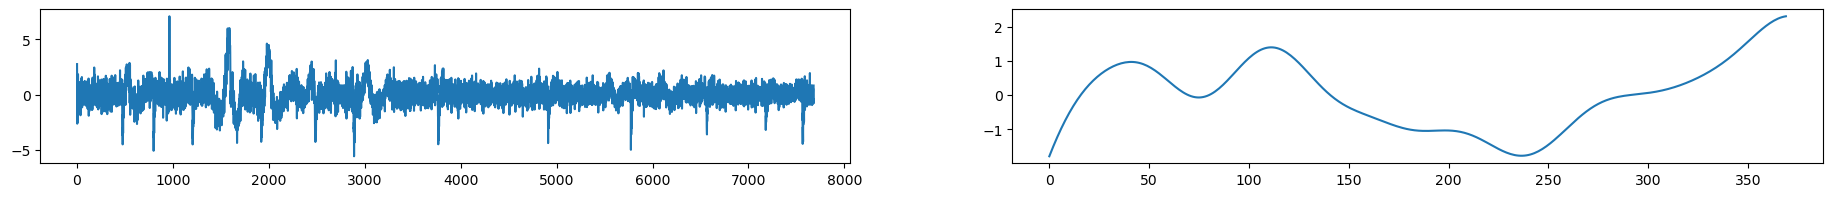

In [ ]:
plt.figure(figsize=(23,2))
plt.subplot(121)
plt.plot(eeg_[0,0,0])
plt.subplot(122)
plt.plot(fnirs_[0,0,0])

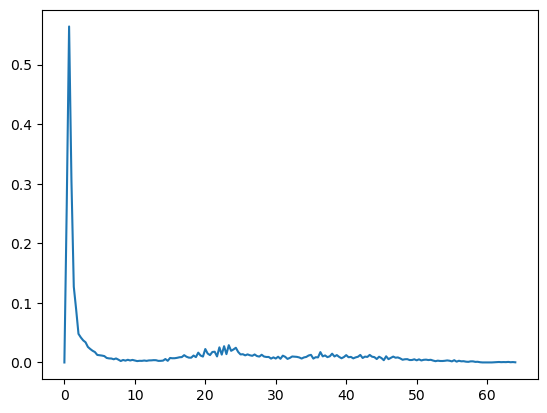

In [150]:
from scipy.signal import welch, periodogram
p = np.zeros((193,))
windows = 20
for i in range(windows):
    f, pxx = periodogram(eeg_[0,0,0,i*60//windows*128:(i+1)*60//windows*128], 128)
    p += pxx

plt.plot(f,p/windows)

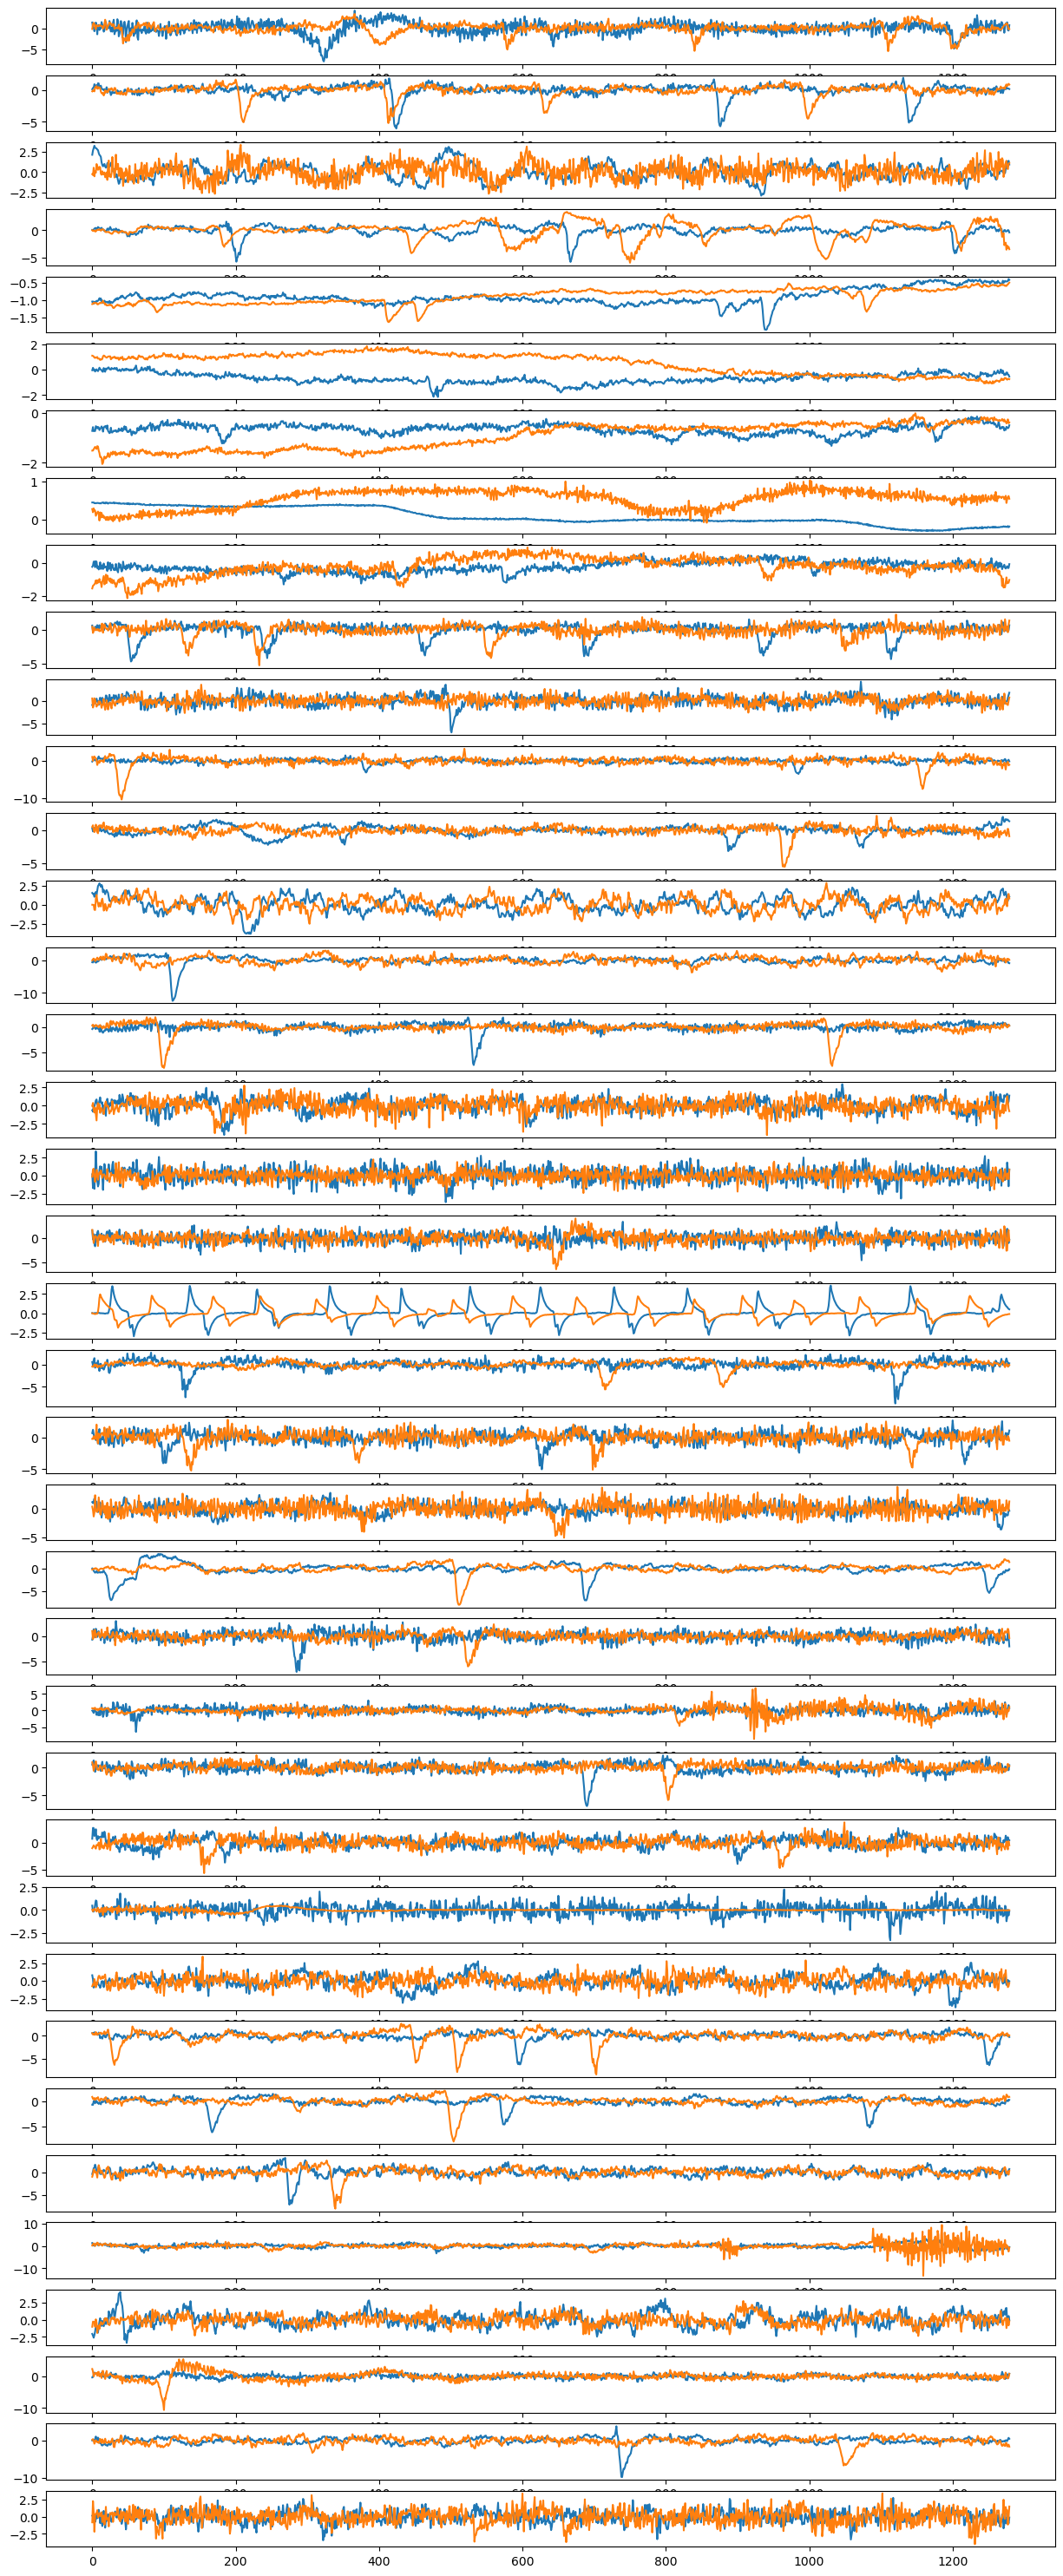

In [161]:
plt.figure(figsize=(15,38))
ch = 6
for i in range(38):
    plt.subplot(38,1,i+1)
    plt.plot(eeg_[i,0,ch,1280:2560])
    plt.plot(eeg_[i,1,ch,1280:2560])

In [66]:
np.savez_compressed('mist_data.npz', eeg=eeg, fnirs=fnirs_, label=label)